<a href="https://colab.research.google.com/github/AkindeKadjo/White_Wine_Quality/blob/main/02_Project2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

Date: 10/04/22

#Project: White Wine Quality

Data Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

The goal  of the project is to model wine quality based on physicochemical tests

The provided datasets is that of the white vinho verde wine samples, from the north of Portugal. 

In [1]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
#Loading the data
filename = '/content/drive/MyDrive/Coding Dojo/07 Week 7 Classification/winequality-white.csv'
Original_df = pd.read_csv(filename)
# keeping a copy of the df as a safety net
df = Original_df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


A quick check for the data info is done to have an overall idea of the loaded data set

In [3]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#renaming the columns
df = df.rename(columns={'fixed acidity':'fixed_acidity',
                          'volatile acidity':'volatile_acidity',
                          'citric acid':'citric_acid',
                          'residual sugar':'residual_sugar', 
                          'free sulfur dioxide':'free_sulfur_dioxide',
                          'total sulfur dioxide':'total_sulfur_dioxide'})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data Cleaning

##Checking for missing values and duplicates

In [5]:
# how many data points are duplicated?
df.duplicated().sum()

937

In [6]:
#I'll go ahead and drop them and check again to see if there are still duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
#check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Addressing Data Inconcistencies

In [8]:
#checking for significant outliers for the numerical data
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,6.84,0.28,0.33,5.91,0.05,34.89,137.19,0.99,3.20,0.49,10.59,5.85
std,0.87,0.10,0.12,4.86,0.02,17.21,43.13,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


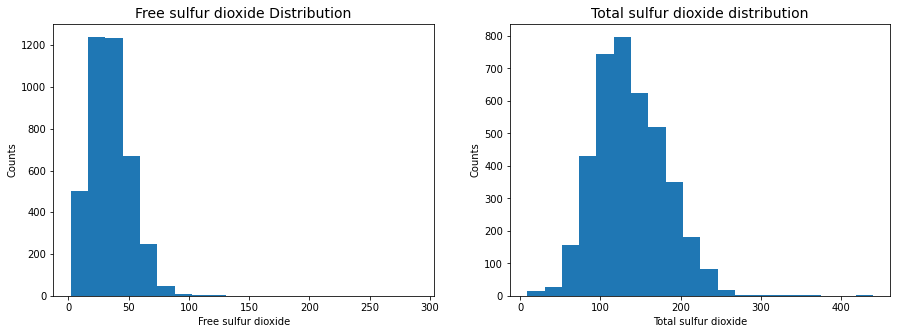

In [15]:
#The maximum free sulfur dioxide seemed a bit too high, let's look at the histogram of both free sulfur dioxide and total sulfur dioxide
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5));
axes[0].hist(df['free_sulfur_dioxide'], bins = 20)
axes[0].set_title('Free sulfur dioxide Distribution', fontsize = 14)
axes[0].set_xlabel('Free sulfur dioxide')
axes[0].set_ylabel('Counts')

axes[1].hist(df['total_sulfur_dioxide'], bins = 20)
axes[1].set_title('Total sulfur dioxide distribution', fontsize = 14)
axes[1].set_xlabel('Total sulfur dioxide')
axes[1].set_ylabel('Counts');

In [16]:
#The maximun free sulfur dioxide of 289 seems like a miss entered value, this needs to be changed by droping the row containing the age value 289
df = df[df.free_sulfur_dioxide != 289]
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00,3960.00
mean,6.84,0.28,0.33,5.92,0.05,34.83,137.12,0.99,3.20,0.49,10.59,5.86
std,0.87,0.10,0.12,4.86,0.02,16.73,42.87,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,146.50,366.50,1.04,3.82,1.08,14.20,9.00


#Assessing the factors affecting the Wine quality

##Histogram

>The histogram gives us an overview of the distributions of the wine quality in our dataset.

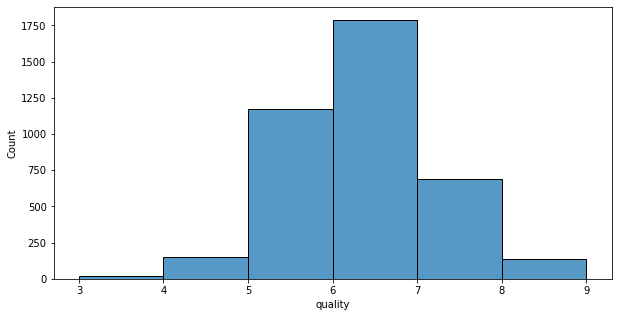

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="quality",binwidth=1);

>The majority of wine in our data set have a quality metric 6 with very few on the lower end of 3 while some at the high end of 8.

##Heatmap

>The Heat map is an indication of how each item correlate to one another and most importantly how they correlate to the wine quality.

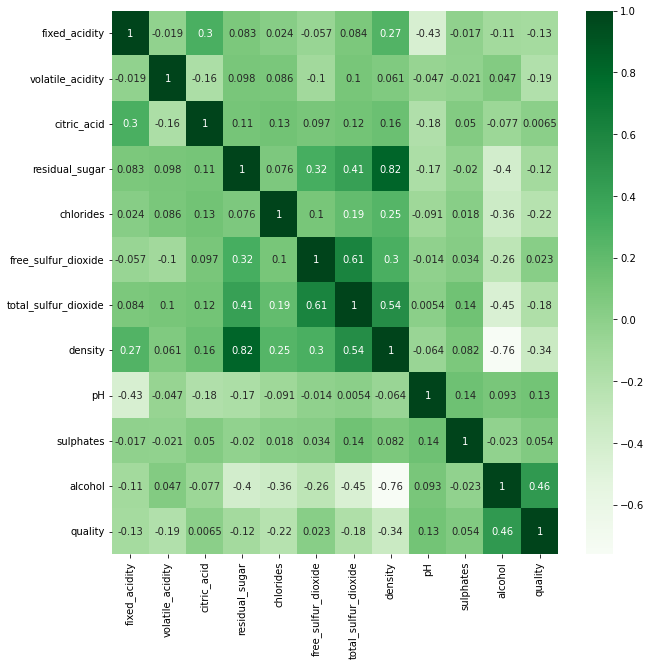

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, cmap = 'Greens', annot =True);

>By the look of it, 'alcohol' has the highest correlation with wine quality followed by 'density' and 'chlorides' and few weaker correlations such as  'fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide' and 'pH'. The remaining columns ('citric acid', 'free sulfur dioxide' and 'sulphates') with the lowest correlations will be dropped from our analyses as they won't contribute much to our prediction of the wine quality.